# Импортируем библиотеки `"pandas"` (библиотека для обработки и анализа данных), `"matmlotlib"` (низкоуровневая библиотека для построения графиков на `Python`, которая служит в качестве утилиты визуализации), а именно модуль `.pyplot` (модуль в пакете Matplotlib), `NumPy` - это библиотека Python, которую применяют для математических вычислений: начиная с базовых функций и заканчивая линейной алгеброй и `Seaborn` — это программный пакет визуализации данных для языка программирования Python, основанный на библиотеке Matplotlib.
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Перед анализом данных, очень важно выполнить этап предварительной обработки и очистки данных `(data cleaning & preprocessing)`. Это фундаментальный шаг, обеспечивающий корректность последующего анализа и визуализации.
---

| Шаг | Описание | Пример кода (Python) |
| ----------- | ----------- | ----------- |
| 1. Загрузка данных | Загрузить и ознакомится с набором данных | ✅Загрузка `CSV` или `Excel-файла`. Убедитесь, что указали правильный путь и кодировку (`encoding='utf-8'` или `'cp1251'` при необходимости). Для `Excel` используйте `pd.read_excel()`, а для `CSV` файла `df = pd.read_csv("data.csv/xlsx")` |
|  | Просмотр первых строк | ✅`df.head()` - Просмотр первых 5 строк — позволяет быстро оценить структуру и наличие очевидных проблем в данных. |
|  | Размерность таблицы | ✅`df.shape` - Возвращает (строки, столбцы), помогает понять размер набора данных.|
|  | Типы данных | ✅`df.info()` - Важный этап: показывает типы данных и наличие пропущенных значений. Помогает наметить стратегию очистки.|
|  | Статистика по числовым | ✅`df.describe()` - Дает сводную статистику по числовым признакам: среднее, минимум, максимум, квартили и т.д. Полезно для выявления выбросов.|
| 2. Пропущенные значения | Найти пропуски | ✅`df.isnull().sum()` - Показывает количество пропущенных значений по каждому столбцу. Критически важно для планирования очистки.|
|  | Удалить строки с пропусками | ❌`df.dropna(inplace=True)` - Осторожно! Удаляет все строки с хотя бы одним NaN. Может привести к сильной потере данных. Лучше применять только, если доля пропусков мала.|
|  | Заполнить средним | ❌`df['col'].fillna(df['col'].mean(), inplace=True)` - Заполняет средним значением. Применимо только к числовым признакам. Не подходит для категориальных данных или данных с сильными выбросами. Для категорий лучше использовать моду (.mode()[0]).|
| 3. Дубликаты | Найти дубликаты | ✅`df.duplicated().sum()` - Выявляет количество полностью дублирующихся строк.|
|  | Удалить дубликаты | ✅`df.drop_duplicates(inplace=True)` - Удаляет все полностью идентичные строки. Иногда полезно добавить subset=['col1', 'col2'] для удаления дубликатов по определённым признакам.|
| 4. Типы данных | Приведение типа к числовому | ✅`df['col'] = df['col'].astype(float)` - Преобразование в числовой тип (float). Если значения представлены как строки, но содержат числа — важно выполнить .str.replace(',', '.') при необходимости.|
|  | Преобразование в дату | ❌`df['date'] = pd.to_datetime(df['date'])` - Преобразование в формат datetime — обязательно перед анализом по дате: группировки, фильтрация по времени, визуализация.|
|  | Категориальный тип | ✅`df['col'] = df['col'].astype('category')` - Оптимизация памяти и явное указание на категориальный признак. Полезно для переменных с ограниченным числом уникальных значений.|
| 5. Текстовые данные | Очистка текста | ❌`df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)` - Удаление пунктуации, спецсимволов. Полезно перед анализом текста (например, WordCloud, NLP). Можно дополнительно привести к нижнему регистру (.str.lower()).|
| 6. Финальная проверка | Проверка на пропуски | ✅`df.isnull().sum()` - Финальная проверка на пропуски перед сохранением или анализом. Желательно, чтобы в финальном наборе данных не было NaN.|
|  | Сохранение очищенных данных | ❌`df.to_csv('clean_data.csv', index=False)` - Сохраняет очищенный датафрейм без индекса. Проверьте, чтобы путь и имя файла были корректны.|

In [2]:
# ========== 1. Загрузка данных ==========
# Загрузка csv-файла в объект DataFrame.
# Метод pd.read_csv() считывает данные из файла csv (формата .csv) и загружает в таблицу.
df_games = pd.read_csv("games.csv")

In [3]:
# ========== 2. Первичный осмотр ==========
# Отображаем первые 5 строк датафрейма
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Отображаем последние 5 строк датафрейма
df_games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
# Функция .info() показывает информацию о DataFrame
# Включая типы данных и использование памяти
# memory_usage = "deep" позволяет получить более точную информацию о потреблении памяти
# Важно отметить, что использование memory_usage = "deep" может занять больше времени, так как оно требует дополнительного анализа
df_games.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.0 MB


In [6]:
# Метод .describe() используется для получения сводной статистики по DataFrame.
# Он автоматически рассчитывает количество ненулевых значений (count), среднее значение (mean),
# стандартное отклонение (std / разброс данных), минимальное значение (min), 25-й, 50-й (медиана) и 75-й процентили (quartiles), а также максимальное значение (max)
# для каждого числового столбца в DataFrame df_excel.
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
# Просматриваем размерность таблицы
df_games.shape

(16715, 11)

In [8]:
# Заменяем недопустимые значения
df_games["User_Score"] = df_games["User_Score"].replace("tbd", np.nan)

# Преобразуем в float
df_games["User_Score"] = df_games["User_Score"].astype(float)

# Проверяем
print(df_games["User_Score"].dtype)

float64


In [9]:
# Находим пропуски
df_games.isnull().sum()
# Пропусков слишком много. Удаление приведет к потере данных

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         9125
Rating             6766
dtype: int64

In [10]:
# Находим дубликаты
df_games.duplicated().sum()

np.int64(0)

In [11]:
# Переводим в категориальный типы данных для снижения нагрузки на память
df_games["Platform"] = df_games["Platform"].astype("category")
df_games["Genre"] = df_games["Genre"].astype("category")
df_games["Rating"] = df_games["Rating"].astype("category")

df_games.dtypes

Name                 object
Platform           category
Year_of_Release     float64
Genre              category
NA_sales            float64
EU_sales            float64
JP_sales            float64
Other_sales         float64
Critic_Score        float64
User_Score          float64
Rating             category
dtype: object

## **Задание 1: Гистограмма с агрегированными данными**
### Сгруппируйте данные по платформам и вычислите средние продажи игр в Северной Америке `(NA_sales)` для каждой платформы. Постройте гистограмму, чтобы визуализировать это распределение.
### Подсказка: Используйте `df.groupby('Platform')['NA_sales'].mean()` для агрегации данных, а затем `plt.hist()` или `sns.histplot()` для визуализации.
---

In [ ]:
df_grouped = df_games.groupby("Platform")["NA_sales"].mean()
df_grouped.head()

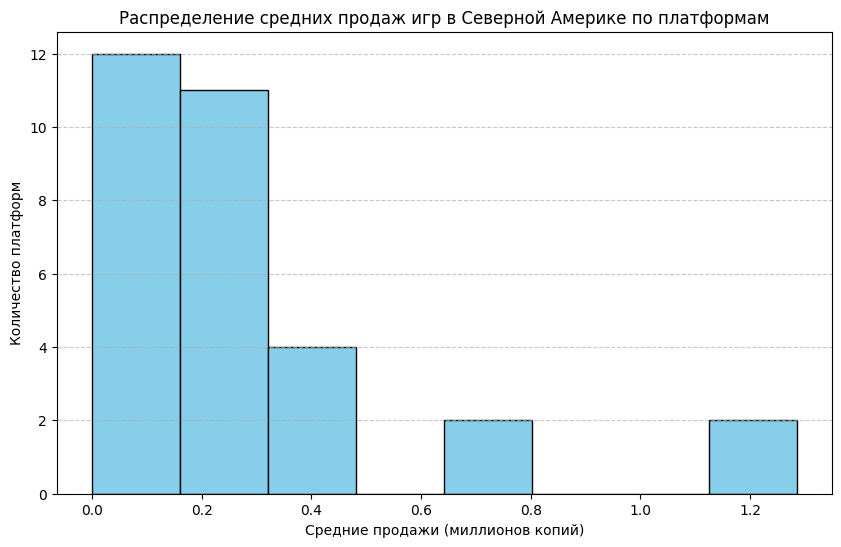

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df_grouped, bins=8, color="skyblue", edgecolor="black")

plt.title("Распределение средних продаж игр в Северной Америке по платформам")
plt.xlabel("Средние продажи (миллионов копий)")
plt.ylabel("Количество платформ")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Задание 2: Линейный график с суммарными данными**
### Сгруппируйте данные по годам и вычислите общее количество выпущенных игр в каждом году. Постройте линейный график, чтобы показать, как это количество изменялось со временем.
### Подсказка: Агрегируйте данные с помощью `df.groupby('Year_of_Release')['Name'].count()` и используйте `plt.plot()` или `sns.lineplot()`.
---

In [14]:
df_grouped_date = df_games.groupby("Year_of_Release")["Name"].count()
df_grouped_date.head()

Year_of_Release
1980.0     9
1981.0    46
1982.0    36
1983.0    17
1984.0    14
Name: Name, dtype: int64

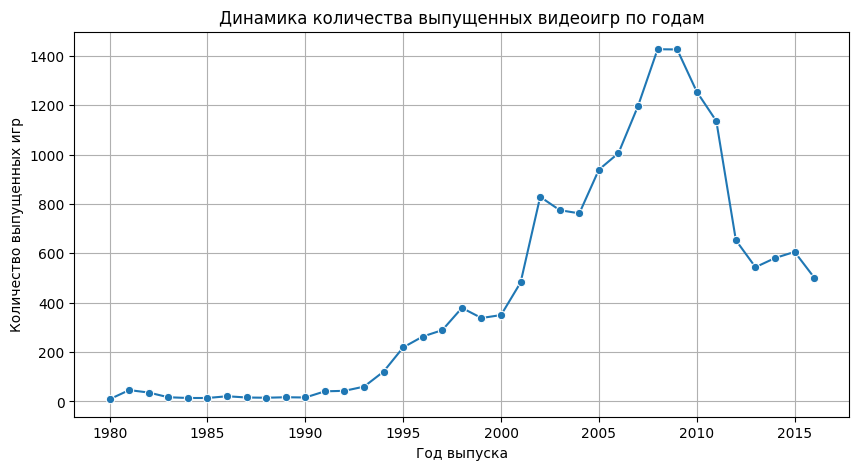

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_grouped_date.index, y=df_grouped_date.values, marker="o")

plt.title("Динамика количества выпущенных видеоигр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.grid()
plt.show()

## **Задание 3: Барчарт с агрегированными данными по жанрам**
### Сгруппируйте данные по жанрам и вычислите суммарные продажи игр в Северной Америке `(NA_sales)` для каждого жанра. Постройте `барчарт`, чтобы визуализировать эти данные.
### Подсказка: Агрегируйте данные с помощью `df.groupby('Genre')['NA_sales'].sum()` и затем используйте `plt.bar()` или `sns.barplot()`.
---

In [16]:
# Группируем и преобразуем в DataFrame
df_grouped_genre = df_games.groupby("Genre")["NA_sales"].sum()

df_grouped_genre.head()

C:\Users\Apollo Z\AppData\Local\Temp\ipykernel_3572\1253043890.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_genre = df_games.groupby("Genre")["NA_sales"].sum()


Genre
Action       879.01
Adventure    105.26
Fighting     223.36
Misc         407.27
Platform     445.50
Name: NA_sales, dtype: float64

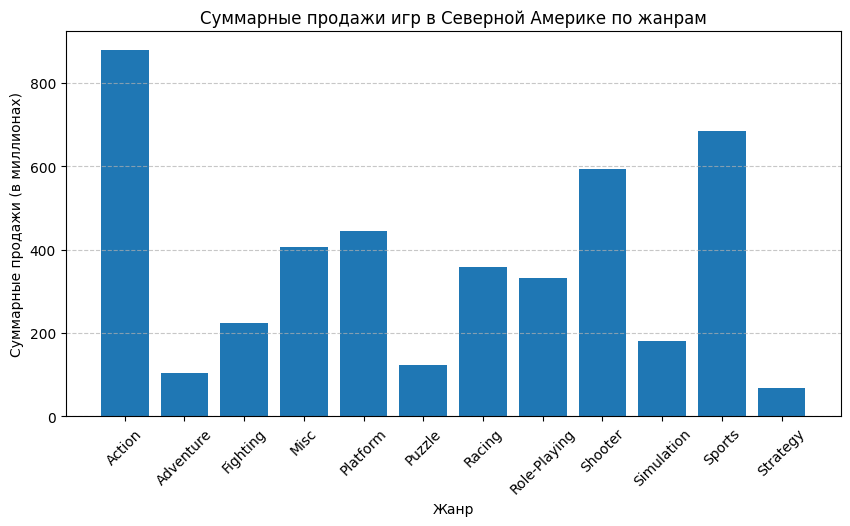

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(df_grouped_genre.index, df_grouped_genre.values)

plt.title("Суммарные продажи игр в Северной Америке по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Суммарные продажи (в миллионах)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Задание 4: Пайчарт с распределением по платформам**
### Сгруппируйте данные по платформам и вычислите суммарные продажи игр в Северной Америке `(NA_sales)` для каждой платформы. Постройте круговую диаграмму `(пайчарт)`, чтобы визуализировать долю каждой платформы в общих продажах.
### Подсказка: Агрегируйте данные с помощью `df.groupby('Platform')['NA_sales'].sum()` и используйте `plt.pie()` для визуализации.
---

In [ ]:
df_grouped_platform = df_games.groupby("Platform")["NA_sales"].sum()

df_grouped_platform.head()

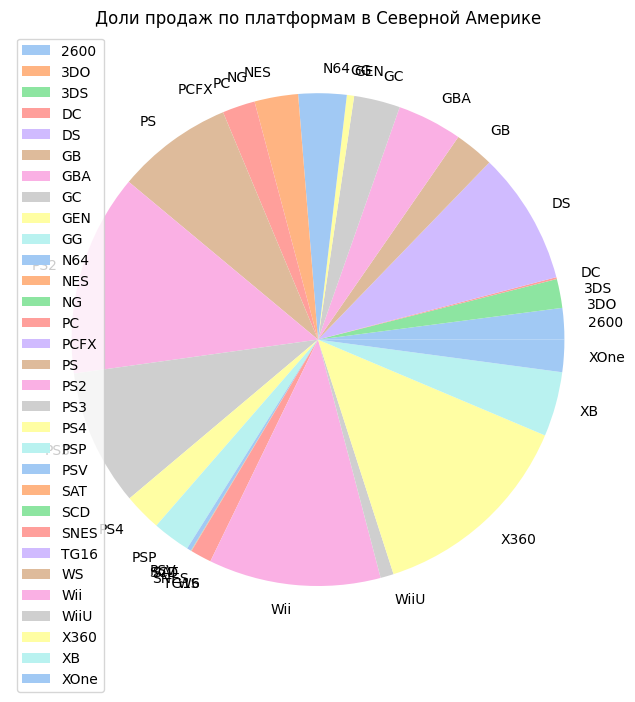

In [36]:
plt.figure(figsize=(18, 8))

plt.pie(
    df_grouped_platform, 
    labels=df_grouped_platform.index,
    #autopct = "%1.f%%",
    colors = sns.color_palette("pastel")
)

plt.title("Доли продаж по платформам в Северной Америке")
plt.legend()
plt.show()

## **Задание 5: Боксплот с агрегированными данными по жанрам**
### Сгруппируйте данные по жанрам и вычислите медианные продажи игр в Северной Америке `(NA_sales)` для каждого жанра. Постройте `боксплот`, чтобы визуализировать распределение этих данных.
### Подсказка: Агрегируйте данные с помощью `df.groupby('Genre')['NA_sales'].median()` и затем используйте `sns.boxplot()`.
---

In [ ]:
"""
В условиях смешаны два несовместимых действия:

 groupby('Genre')['NA_sales'].median() → выдаёт по одному числу на жанр.

 sns.boxplot(...) — нужен набор значений по жанрам, чтобы построить распределение.
"""
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_games, x="Genre", y="NA_sales", palette="pastel")

plt.title("Распределение продаж игр в Северной Америке по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Продажи (в миллионах)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Задание 6: Тепловая карта с агрегированными данными по платформам и годам**
### Сгруппируйте данные по платформам и годам выпуска, суммируйте продажи в Северной Америке `(NA_sales)` для каждой группы. Постройте тепловую карту для отображения этих данных.
### Подсказка: Агрегируйте данные с помощью `df.groupby(['Platform', 'Year_of_Release'])['NA_sales'].sum().unstack()` и используйте `sns.heatmap()` для визуализации.
---

In [ ]:
df_grouped_heatmap = (
    df_games.groupby(["Platform", "Year_of_Release"])["NA_sales"]
    .sum()
    .unstack()
)

df_grouped_heatmap.head()

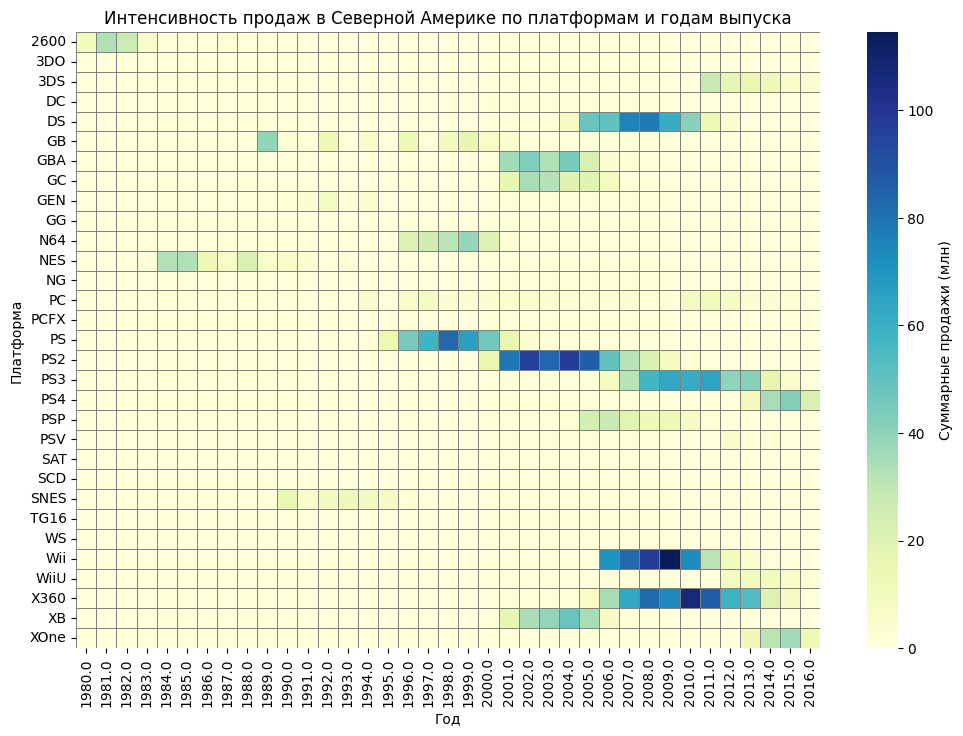

In [58]:
plt.figure(figsize=(12,8))

sns.heatmap(
    df_grouped_heatmap,
    cmap="YlGnBu",          # Цветовая палитра
    linewidths=0.5,         # Линии между ячейками
    linecolor="gray",
    annot=False,            # Можно True, если хотите значения внутри
    cbar_kws={'label': 'Суммарные продажи (млн)'}
)

plt.title("Интенсивность продаж в Северной Америке по платформам и годам выпуска")
plt.xlabel("Год")
plt.ylabel("Платформа")
plt.show()